# Проверка [данной](https://phys.org/news/2024-04-grades-students-surnames-alphabetical.pdf) статьи для баллов ЕГЭ 

In [1]:
import pandas as pd
import numpy as np

In [2]:
parts = []
for i in range(10):
    part = pd.read_csv(f'Data/full_data_{i}.csv')
    parts.append(part)

df = pd.concat(parts, ignore_index=True)
df

C:\Users\2reckey\AppData\Local\Temp\ipykernel_11272\3886265999.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  part = pd.read_csv(f'Data/full_data_{i}.csv')


,Year,University,Faculty,Program,Name,Score,Avg_score,Num_subjects,Quota,All_app,...,q25_by_2Q,q25_by_3Q,q25_by_4Q,q25_by_5Q,q25_by_6Q,q25_by_7Q,q25_by_8Q,q25_by_9Q,q25_by_10Q,Is_pass
0,2017,ВШЭ,Департамент иностранных языков,Лингвистика (45.03.02) (Иностранные языки и ме...,Бунтман Вера Сергеевна,309,103.000000,3,30,1413,...,99.333333,98.666667,98.000000,97.333333,97.0,96.666667,96.333333,96.000000,95.333333,True
1,2017,ВШЭ,Департамент иностранных языков,Лингвистика (45.03.02) (Иностранные языки и ме...,Мунтян Марина Евгеньевна,308,102.666667,3,30,1413,...,99.333333,98.666667,98.000000,97.333333,97.0,96.666667,96.333333,96.000000,95.333333,True
2,2017,ВШЭ,Департамент иностранных языков,Лингвистика (45.03.02) (Иностранные языки и ме...,Соколова Виктория Сергеевна,307,102.333333,3,30,1413,...,99.333333,98.666667,98.000000,97.333333,97.0,96.666667,96.333333,96.000000,95.333333,True
3,2017,ВШЭ,Департамент иностранных языков,Лингвистика (45.03.02) (Иностранные языки и ме...,Ужакина Анна Андреевна,307,102.333333,3,30,1413,...,99.333333,98.666667,98.000000,97.333333,97.0,96.666667,96.333333,96.000000,95.333333,True
4,2017,ВШЭ,Департамент иностранных языков,Лингвистика (45.03.02) (Иностранные языки и ме...,Крюкова Алеся Алексеевна,306,102.000000,3,30,1413,...,99.333333,98.666667,98.000000,97.333333,97.0,96.666667,96.333333,96.000000,95.333333,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641405,2022,МГТУ им. Баумана,AllFaculty,Ядерные реакторы и материалы (14.05.01),16103802721,174,58.000000,3,48,479,...,91.000000,88.666667,86.666667,84.916667,83.0,81.666667,80.333333,78.583333,77.000000,False
1641406,2022,МГТУ им. Баумана,AllFaculty,Ядерные реакторы и материалы (14.05.01),16530926467,170,56.666667,3,48,479,...,91.000000,88.666667,86.666667,84.916667,83.0,81.666667,80.333333,78.583333,77.000000,False
1641407,2022,МГТУ им. Баумана,AllFaculty,Ядерные реакторы и материалы (14.05.01),18467618619,162,54.000000,3,48,479,...,91.000000,88.666667,86.666667,84.916667,83.0,81.666667,80.333333,78.583333,77.000000,False
1641408,2022,МГТУ им. Баумана,AllFaculty,Ядерные реакторы и материалы (14.05.01),18625786822,160,53.333333,3,48,479,...,91.000000,88.666667,86.666667,84.916667,83.0,81.666667,80.333333,78.583333,77.000000,False


In [3]:
name_df = df.loc[~df["Year"].isin([2021, 2022]), ["Name", "Avg_score"]].drop_duplicates()
name_df

,Name,Avg_score
0,Бунтман Вера Сергеевна,103.000000
1,Мунтян Марина Евгеньевна,102.666667
2,Соколова Виктория Сергеевна,102.333333
3,Ужакина Анна Андреевна,102.333333
4,Крюкова Алеся Алексеевна,102.000000
...,...,...
1488497,Чурин Никита Алексеевич,41.000000
1488499,Ардашкин Дмитрий Алексеевич,39.333333
1488500,Шалушкина Валерия Олеговна,37.333333
1488501,Несрединов Магомедмирза Шакирович,37.000000


In [4]:
name_df["Frst_l"] = name_df["Name"].apply(lambda x: str(x).upper()[0])
name_df = name_df.drop("Name", axis=1)
name_df = name_df[name_df["Frst_l"].str.contains(r'[А-Я]')]
name_df

,Avg_score,Frst_l
0,103.000000,Б
1,102.666667,М
2,102.333333,С
3,102.333333,У
4,102.000000,К
...,...,...
1488497,41.000000,Ч
1488499,39.333333,А
1488500,37.333333,Ш
1488501,37.000000,Н


In [5]:
name_df["Frst_l"].unique()

array(['Б', 'М', 'С', 'У', 'К', 'Н', 'О', 'И', 'З', 'Х', 'В', 'Г', 'Л',
       'Ш', 'Т', 'Ч', 'А', 'П', 'Д', 'Я', 'Р', 'Ф', 'Е', 'Ю', 'Ц', 'Э',
       'Щ', 'Ж', 'Й', 'Ы'], dtype=object)

In [6]:
name_df["Frst_l"].value_counts()

Frst_l
К    81753
С    59842
М    49257
Б    45810
П    42601
Г    36847
А    32347
Л    24029
Т    22996
В    22903
Ш    22664
Д    22539
Р    19264
Н    18476
З    15841
И    14273
Ч    13603
Ф    13019
Х    12020
Е    11918
О    10008
Ж     6602
Я     6362
У     5504
Ц     3557
Ю     3100
Щ     2671
Э      971
Й       46
Ы       19
Name: count, dtype: int64

In [7]:
result = name_df.groupby("Frst_l")["Avg_score"].agg(["count", "mean", "std"]).sort_index()

result = result[result["count"] > 1000]
result["mean"] -= result["mean"].min()
result

,count,mean,std
Frst_l,,,
А,32347,0.430807,12.063070
Б,45810,0.748837,11.905114
В,22903,0.994274,11.903871
Г,36847,0.752699,11.828907
Д,22539,0.729540,11.886894
Е,11918,0.671192,11.903571
Ж,6602,0.000000,12.031402
З,15841,1.110832,11.926202
И,14273,0.721090,12.061249


<Axes: xlabel='Frst_l', ylabel='mean'>

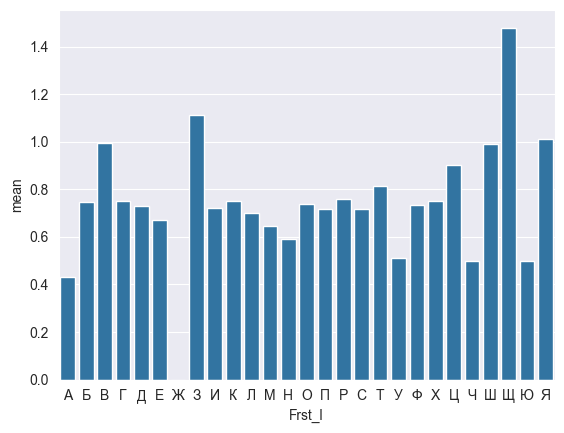

In [8]:
import seaborn as sns

sns.barplot(result['mean'])

Действительно разница должна быть вызвана усталостью преподавателей, а не фамилией (предпологалось что люди с первыми буквами в фамилии более тчательно гововились к предметам так их вызывали с большей вероятностью)